In [ ]:
# Temel Kütüphaneler
import numpy as np
import pandas as pd

# Görselleştirme
import seaborn as sns #for plotting
import matplotlib.pyplot as plt

# Model Kurma
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

from sklearn import preprocessing

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier

Verinin çağırılması

Bu aşamada verimizi içeri alıyoruz ardından değişkenlerin kısaltmalarının anlamlarını ve hangi değerleri aldığını açıklıyoruz.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/heart.csv')

In [ ]:
# Verimize bakalım.
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


Değişkenler

Verimize yakından baktığımızda oldukça temiz bir yapısı olduğunu görüyoruz. Eksik değerlerin kontrolü ve boyutlarına bakmadan önce değişkenlerin kısaltmaları;


Yaş
Cinsiyet
Göğüs ağrısı tipi (4 değer)
Dinlenme kan basıncı
Serum kolestrolü (mg / dl)
Açlık kan şekeri (>120 mg / dl)
Elektrokardiyografik sonuçların dinlenmesi (değerler 0,1,2)
Elde edilen maksimum kalp atış hızı
Egzersize bağlı Anjin (Anjin, kalbe kan akışının azalmasından kaynaklanan bir tür göğüs ağrısıdır.)
Eski tepe noktası = istirahate bağlı egzersiz ile indüklenen ST depresyonu
Tepe egzersizi ST segmentinin eğimi
floroskopi ile renklendirilmiş ana damarların sayısı (0-3)
thal:
3 = normal
6 = sabit hata
7 = tersinir defekt


yaş: Kişinin yaşı cinsiyet: Kişinin cinsiyeti (1 = erkek, 0 = kadın) cp: Yaşanan göğüs ağrısı (Değer 1: tipik anjina, Değer 2: atipik anjina, Değer 3: anjinal olmayan ağrı, Değer 4 : asemptomatik) trestbps: Kişinin istirahat kan basıncı (hastaneye kabul edildiğinde mm Hg) chol: Kişinin mg/dl cinsinden kolesterol ölçümü fbs: Kişinin açlık kan şekeri (> 120 mg/dl, 1 = doğru; 0 = yanlış) ) restecg: İstirahat elektrokardiyografik ölçümü (0 = normal, 1 = ST-T dalga anormalliği var, 2 = Estes kriterlerine göre olası veya kesin sol ventrikül hipertrofisini gösteriyor) thalach: Kişinin ulaştığı maksimum kalp hızı exang: Egzersize bağlı anjina (1 = evet; 0 = hayır) eski tepe noktası: dinlenmeye göre egzersizle indüklenen ST depresyonu ('ST', EKG grafiğindeki konumlarla ilgilidir. Daha fazlasını burada görün) eğim: egzersiz zirvesinin eğimi ST segmenti (Değer 1: yukarı eğimli, Değer 2 : düz, Değer 3: aşağı eğimli) ca: Ana damarların sayısı (0-3) thal: Talasemi adı verilen bir kan hastalığı (3 = normal; 6 = sabit kusur; 7 = geri döndürülebilir kusur) hedef: Kalp hastalığı (0 = hayır, 1 = evet)

Keşifçi Veri Analizi ve Veri Görselleştirme

Bu bölümde değişkenlere ait değerleri ve değişkenlerin kendi içerisindeki karşılaştırmalarına baktık. Ardından değişken içerisindeki değerlerin karşılaştırmalı grafiğini çizdirdik.

Hasta olanlar ve olmayanların dağılımı

Burada 1 ile gösterilenler kalp hastalığı olanları, 0 ile gösterilenler ise kalp rahatsızlığı olmayanları verir.

Veri setine genel bakış

Veri setimizin son 5 satırı;

In [ ]:
df.tail

<bound method NDFrame.tail of       age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2  

veri setinin yapısına bakıldı. 1025 satır 23 sütündan oluşuyor bazı optimizasyon işlemleri yapılarak 13 sütuna indirgendi ve 1 tanede target isimli sınıfımız mevcuttur.

In [ ]:
print("veri seti:", df.shape)

veri seti: (1025, 14)


In [ ]:
df["target"].value_counts()

1    526
0    499
Name: target, dtype: int64

df ‘deki eksik değerlerin sayısını öğrenelim ve azalan şekilde sıralayalım.

In [ ]:
#boş veri kontrolü
print(df.isnull().sum().sort_values(ascending=False))

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [ ]:
#veri setimizin indeksleri
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


info() metodu ile ;0' dan 10840 a kadar numaralandırılmış 10841 girdi olduğu, her bir sütunda null olmayan girdi sayısı ve sütunun veri tipi gibi bilgileri elde edebiliriz.

Sütunların istatiksel özetine bakalım.

In [ ]:
print(df.describe())

               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0.000000    71.000000  

Değişken Analizi

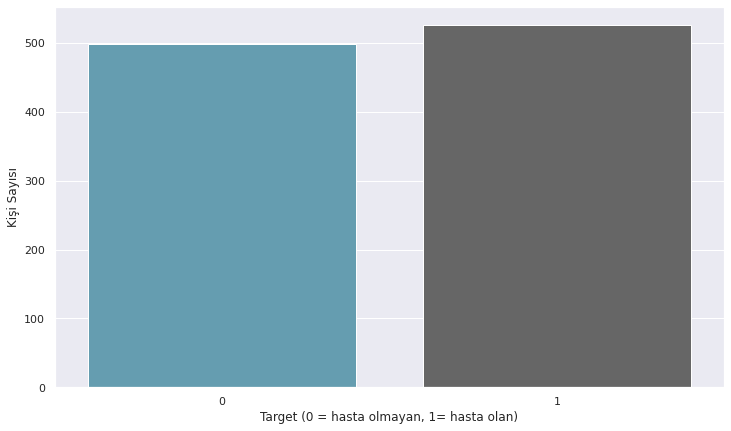

In [ ]:
# seaborn
color = ["#58a3bc","#666666"]
plt.figure(figsize=(12,7))
sns.set()
sns.countplot(x="target",
              data=df,
              palette=color)
plt.ylabel("Kişi Sayısı")
plt.xlabel("Target (0 = hasta olmayan, 1= hasta olan)")



plt.savefig('Hastalık.png',transparent=True)
plt.show()

Hasta olanlar ve olmayanların yüzdelik dağılımları

Değişken Analizi

In [ ]:
countNoDisease = len(df[df.target == 0]) # hastalığı olmayanların sayısı
countHaveDisease = len(df[df.target == 1]) # hastalığı olanların sayısı

print("Kalp Rahatsızlığı olmayan hastaların yüzdesi: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Kalp Rahatsızlığı olan hastaların yüzdesi: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Kalp Rahatsızlığı olmayan hastaların yüzdesi: 48.68%
Kalp Rahatsızlığı olan hastaların yüzdesi: 51.32%


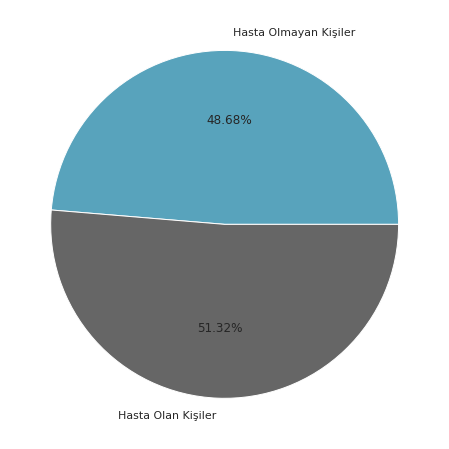

In [ ]:
plt.figure(figsize=(8,8))
color = ["#58a3bc","#666666"]
plt.pie([countNoDisease,countHaveDisease],
        labels=["Hasta Olmayan Kişiler","Hasta Olan Kişiler"],
        colors=color,
        autopct='%1.2f%%');


plt.savefig('Hastalık1.png',transparent=True)

Scatter Plot(Saçılım Grafiği)

Maksimum Kalp Atış Hızı ve Yaş Arasında Hastalık Dağılımı

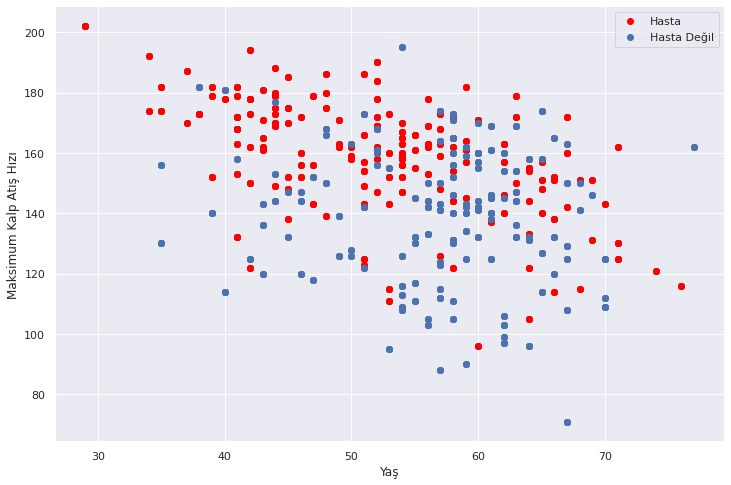

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Hasta", "Hasta Değil"])
plt.xlabel("Yaş")
plt.ylabel("Maksimum Kalp Atış Hızı")
plt.show()

Veri setimizdeki cinsiyet dağılımı

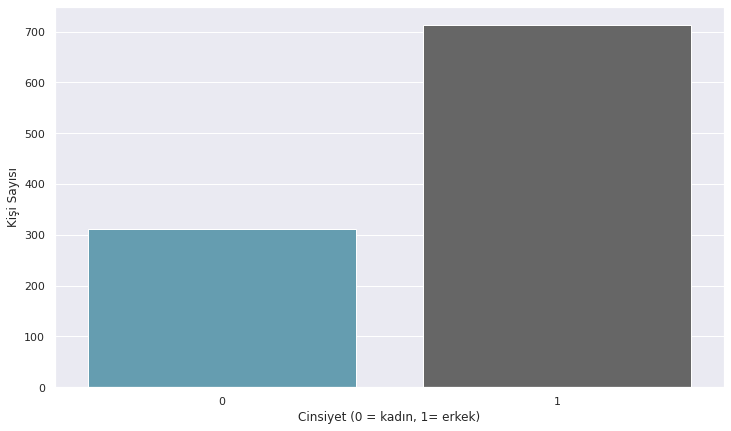

In [ ]:
plt.figure(figsize=(12,7))
sns.set()
sns.countplot(x='sex', data=df, palette=color)
plt.xlabel("Cinsiyet (0 = kadın, 1= erkek)")
plt.ylabel("Kişi Sayısı")
plt.savefig('cinsiyet.png',transparent=True)

plt.show()

In [ ]:
countFemale = len(df[df.sex == 0]) # kadınların sayısı
countMale = len(df[df.sex == 1]) # erkeklerin sayısı
print("Kadın hastaların yüzdesi: {:.2f}%".format((countFemale / (len(df.sex))*100)))
print("Erkek hastaların yüzdesi: {:.2f}%".format((countMale / (len(df.sex))*100)))

Kadın hastaların yüzdesi: 30.44%
Erkek hastaların yüzdesi: 69.56%


Histogram Analizi

Hasta olanların işgal ettiği alan, hasta olmayanlarınkinden daha büyüktür.

In [ ]:
import plotly.express as px
from matplotlib import pyplot as plt
px.histogram(data_frame=df,x=df.age,color='target',color_discrete_sequence=['#A865C9','#f6abb6'])

Korelasyon Analizi

In [ ]:
df.isnull().values.any()

False

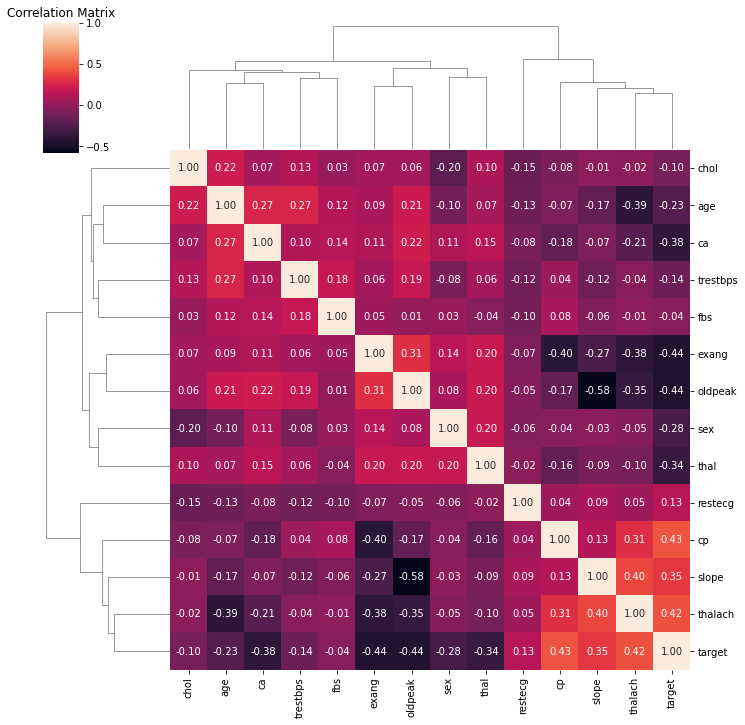

In [ ]:
corr_matrix = df.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation Matrix")
plt.show()

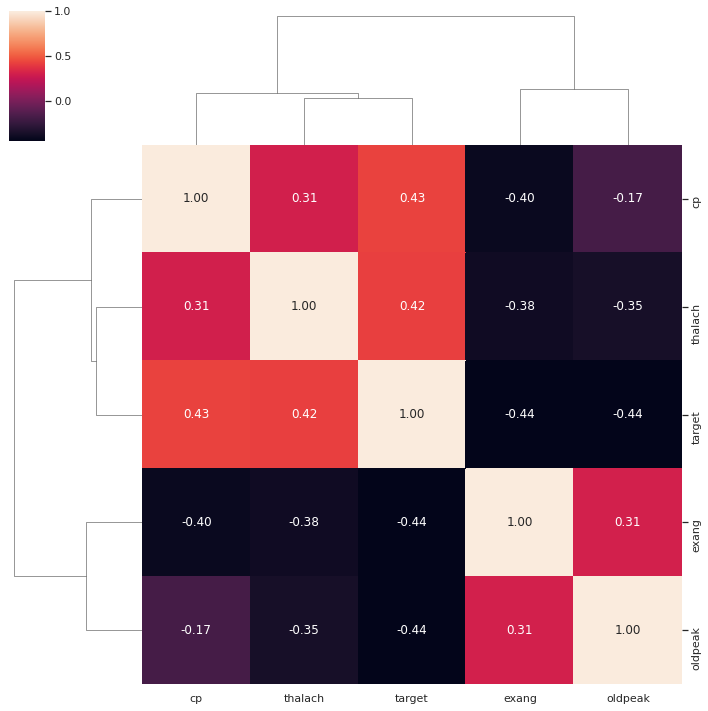

In [ ]:
threshold = 0.40 #sınırımız
filtre = np.abs(corr_matrix["target"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(df[corr_features].corr(), annot = True, fmt = ".2f")

Pair Plot Gösterimi

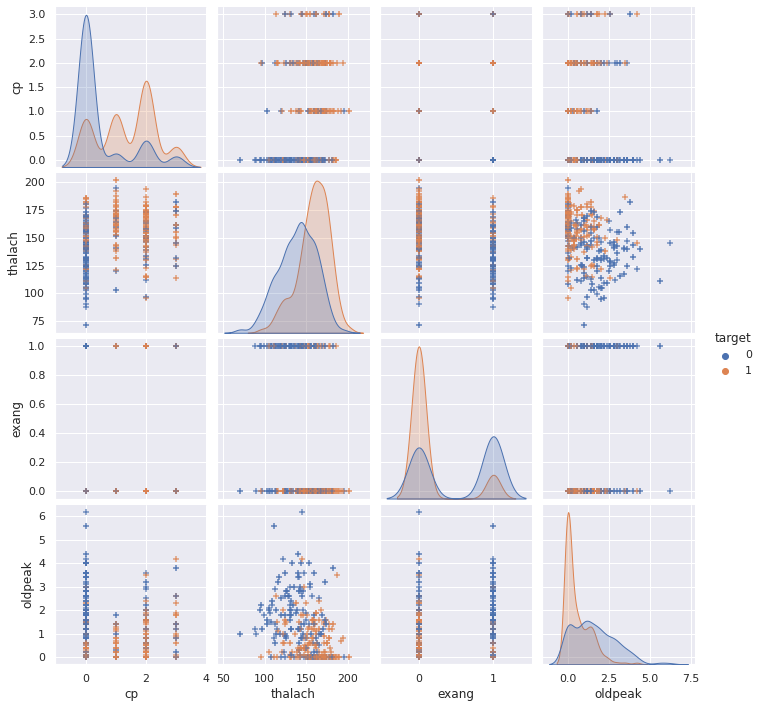

In [ ]:
sns.pairplot(df[corr_features], diag_kind = "kde", markers = "+",hue = "target")
plt.show()

Ön işleme: Train-Test Ayırma

In [ ]:
X = df.drop("target", axis=1).values
y = df["target"].values

In [ ]:
X

array([[52.,  1.,  0., ...,  2.,  2.,  3.],
       [53.,  1.,  0., ...,  0.,  0.,  3.],
       [70.,  1.,  0., ...,  0.,  0.,  3.],
       ...,
       [47.,  1.,  0., ...,  1.,  1.,  2.],
       [50.,  0.,  0., ...,  2.,  0.,  2.],
       [54.,  1.,  0., ...,  1.,  1.,  3.]])

In [ ]:
y

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
from sklearn.model_selection  import  train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 3)
print("X_train", X_train.shape)
print("X_test", X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

X_train (615, 13)
X_test (410, 13)
y_train (615,)
y_test (410,)


In [ ]:
X_train

array([[57.,  1.,  0., ...,  1.,  3.,  3.],
       [46.,  1.,  0., ...,  2.,  0.,  3.],
       [50.,  0.,  0., ...,  2.,  0.,  2.],
       ...,
       [35.,  0.,  0., ...,  2.,  0.,  2.],
       [53.,  1.,  0., ...,  0.,  0.,  3.],
       [54.,  0.,  2., ...,  2.,  0.,  2.]])

In [ ]:
y_train

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,

Hastalık durumuna göre diğer değişkenlerin ortalama değerleri

Hastalık durumuna göre bir gruplandırma işlemi yapılmıştır.

In [ ]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


Yaşlara göre Kalp Rahatsızlığı olup olmaması

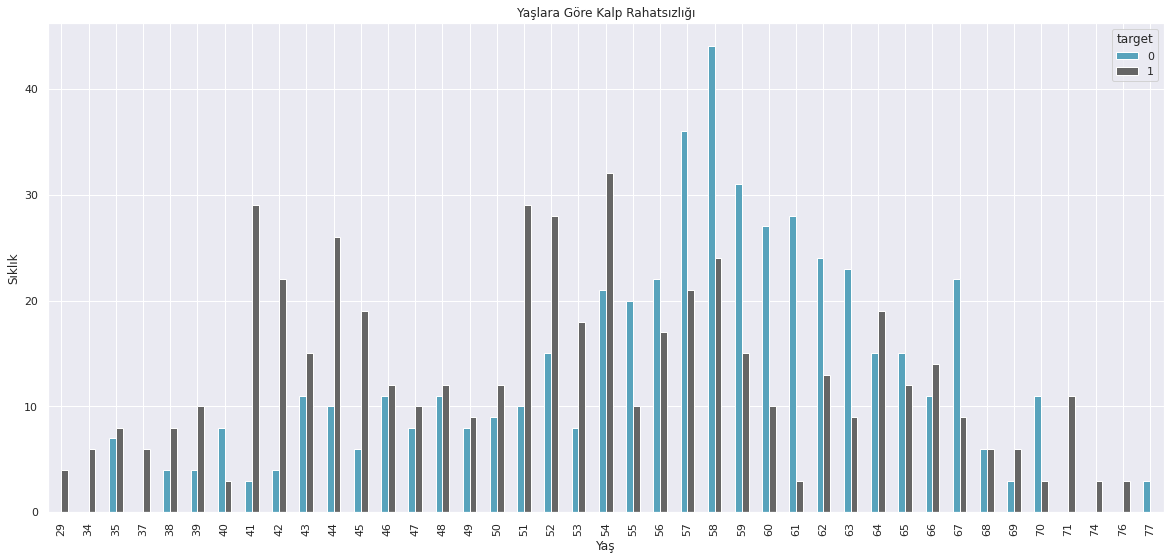

In [ ]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,9),color=color)
plt.title('Yaşlara Göre Kalp Rahatsızlığı')
plt.xlabel('Yaş')
plt.ylabel('Sıklık')
plt.savefig('heartDiseaseAndAges.png',transparent=True)
plt.show()

Cinsiyete göre Kalp rahatsızlığı olup olmaması

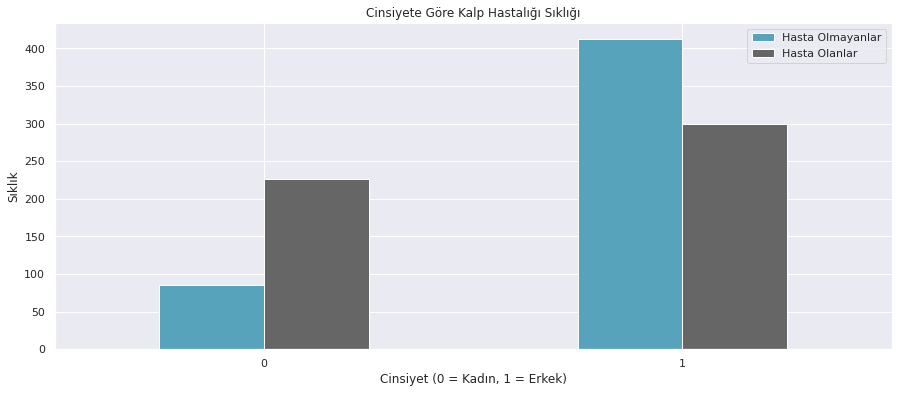

In [ ]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(15,6),color=color)
plt.title('Cinsiyete Göre Kalp Hastalığı Sıklığı')
plt.xlabel('Cinsiyet (0 = Kadın, 1 = Erkek)')
plt.xticks(rotation=0)
plt.legend(["Hasta Olmayanlar", "Hasta Olanlar"])
plt.ylabel('Sıklık')
plt.savefig('cinsiyetegörehastalık.png',transparent=True)


plt.show()

Slope(Eğim) Değişkenine Göre Hastalık Sıklığı

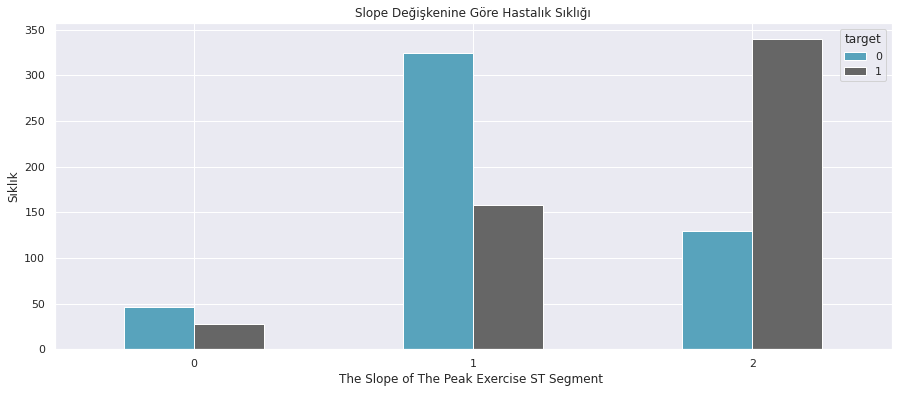

In [ ]:
color = ["#58a3bc","#666666"]
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=color)
plt.title('Slope Değişkenine Göre Hastalık Sıklığı')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Sıklık')
plt.savefig('slope.png',transparent=True)


plt.show()

Açlık Kan Şekerine Göre Kalp Hastalığı Sıklığı

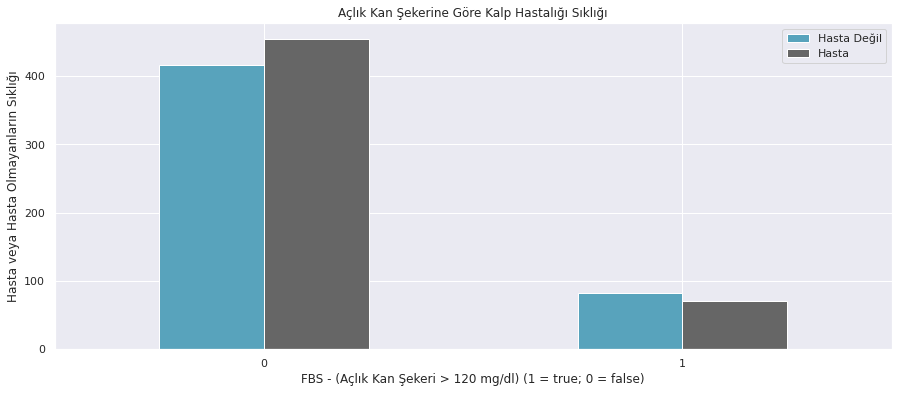

In [ ]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=color)
plt.title('Açlık Kan Şekerine Göre Kalp Hastalığı Sıklığı')
plt.xlabel('FBS - (Açlık Kan Şekeri > 120 mg/dl) (1 = true; 0 = false)')
plt.xticks(rotation = 0)
plt.legend(["Hasta Değil", "Hasta"])
plt.ylabel('Hasta veya Hasta Olmayanların Sıklığı')
plt.savefig('açlık.png',transparent=True)
plt.show()

Göğüs Ağrısı Tipine Göre Halp Hastalığı Sıklığı

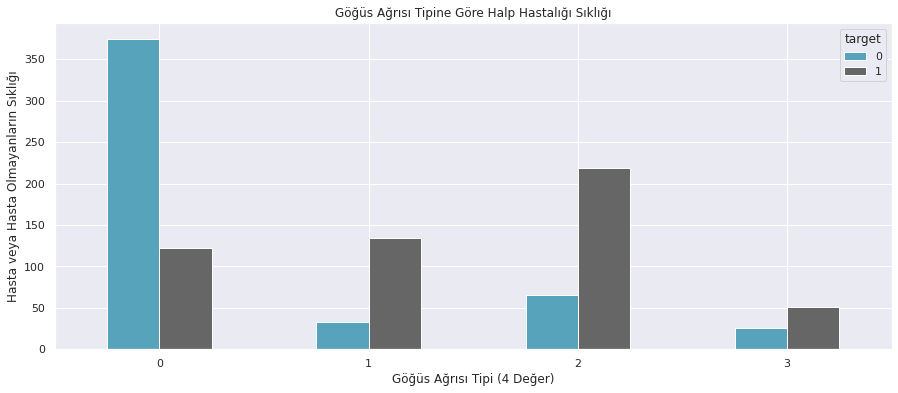

In [ ]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=color)
plt.title('Göğüs Ağrısı Tipine Göre Halp Hastalığı Sıklığı')
plt.xlabel('Göğüs Ağrısı Tipi (4 Değer)')
plt.xticks(rotation = 0)
plt.ylabel('Hasta veya Hasta Olmayanların Sıklığı')
plt.savefig('göğüs.png',transparent=True)


plt.show()

Kategorik Değişkenlerin Dönüştürülmesi

Makine öğrenmesi kısmına geçmeden önce veri setimiz içerisinde bulunan kategorik değişkenlerin dönüştürülmesi gerekmektedir.

Bunun için hangi değişkenlerin kategorik olduğunu ve ölçek türlerini saptamalıyız.

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


İlk bakışta sex, cp, fbs, testecg, exang, slope, ca ve thal değişkenlerinin kategorik olduklarını görüyoruz.

Şimdi bu değişkenlerin değerlerine .uniqe() metodu yardımıyla bakalım. Eğer 0 - 1 haricinde değerler almışlarsa onları Nominal ve Ordinal olarak ayıralım. Nominal ölçek türüne sahip değişkenleri get_dummies() metoduyla tekrardan şekillendirelim.

Çünkü örneğin 0 ve 1 makine için bir ast-üst oluşturmazken içerisinde 0, 1, 2 değerlerini almış bir nominal değişken makinede, 2 değerinin 1 değerinin iki katı gibi bir intiba bırakabilir. Oysa burada 0, 1 ve 2 ile anlatılmak istenen hepsinin ayrı birer kategorik değişken olduğudur yani bizim için bunlar arasında bir ast-üst ilişkisi yoktur.

Bu sebeple eğer dönüştürme işlemini yapmazsak modelimizin yanlış eğitilmesi söz konusu olacaktır.

In [ ]:
print("""
Sex değişkeni eşsiz değerleri: {}
Cp değişkeni eşsiz değerleri: {}
Fbs değişkeni eşsiz değerleri: {}
Restecg değişkeni eşsiz değerleri: {}
Exang değişkeni eşsiz değerleri: {}
Slope değişkeni eşsiz değerleri: {}
Ca değişkeni eşsiz değerleri: {}
Thal değişkeni eşsiz değerleri: {}
""".format(df.sex.unique(),
           df.cp.unique(),
           df.fbs.unique(),
           df.restecg.unique(),
           df.exang.unique(),
           df.slope.unique(),
           df.ca.unique(),
           df.thal.unique()))


Sex değişkeni eşsiz değerleri: [1 0]
Cp değişkeni eşsiz değerleri: [0 1 2 3]
Fbs değişkeni eşsiz değerleri: [0 1]
Restecg değişkeni eşsiz değerleri: [1 0 2]
Exang değişkeni eşsiz değerleri: [0 1]
Slope değişkeni eşsiz değerleri: [2 0 1]
Ca değişkeni eşsiz değerleri: [2 0 1 3 4]
Thal değişkeni eşsiz değerleri: [3 2 1 0]



Burada cp, restecg, slope, ca ve thal değişkenlerinin 0 - 1 haricinde değerlere sahip olduklarını görüyoruz. Bu değişkenlere get_dummies() metodunu uygulamadan önce tiplerine bakalım. get_dummies() metodu obje yada categorik tipleri dönüştürdüğü için içerisinde numerik tipe sahip değişkenlerin dönüşümlerini gerçekleştirelim.

In [ ]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Değişkenlerin Kategorik tiplere dönüştürülmesi.

In [ ]:
df.cp = pd.Categorical(df.cp)
df.restecg = pd.Categorical(df.restecg)
df.slope = pd.Categorical(df.slope)
df.ca = pd.Categorical(df.ca)
df.thal = pd.Categorical(df.thal)

In [ ]:
df.dtypes

age            int64
sex            int64
trestbps       int64
chol           int64
fbs            int64
thalach        int64
exang          int64
oldpeak      float64
cp_1           uint8
cp_2           uint8
cp_3           uint8
restecg_1      uint8
restecg_2      uint8
slope_1        uint8
slope_2        uint8
ca_1           uint8
ca_2           uint8
ca_3           uint8
ca_4           uint8
thal_1         uint8
thal_2         uint8
thal_3         uint8
target         int64
dtype: object

tık get_dummies() metodunu kullanabiliriz.

drop_first=True paremetresi dönüştürülen değişkenlerin çıkartılması işini üstlenecek

In [ ]:
df = pd.get_dummies(df, drop_first=True)

In [ ]:
df = df[['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
         'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'slope_1',
         'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1', 'thal_2',
         'thal_3','target']]

In [ ]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,cp_1,cp_2,...,slope_1,slope_2,ca_1,ca_2,ca_3,ca_4,thal_1,thal_2,thal_3,target
0,52,1,125,212,0,168,0,1.0,0,0,...,0,1,0,1,0,0,0,0,1,0
1,53,1,140,203,1,155,1,3.1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,70,1,145,174,0,125,1,2.6,0,0,...,0,0,0,0,0,0,0,0,1,0
3,61,1,148,203,0,161,0,0.0,0,0,...,0,1,1,0,0,0,0,0,1,0
4,62,0,138,294,1,106,0,1.9,0,0,...,1,0,0,0,1,0,0,1,0,0


MODELİN UYGULANMASI

Makine öğrenmesi kısmına geldik. Bu kısımda sklearn kütüphanesi içerisindeki çeşitli sınıflandırma modellerini uygulayacağız ve bunlar arasında bir karşılaştırma yapıcaz.

Modellerin uygulanmasından önce veri setimizi train ve test olarak ayıralım.

Bu aşamada %80 eğitim ve %20 test olarak veri setimizi rassal olarak ayırıyoruz.

Aynı rassal değişkenleri yakalamak için bir random_state atıyoruz.



## 1.Lojistik Regresyon

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                   df.drop('target', axis=1), # target hariç veri setinin tamamı X
                                   df['target'], # target Y
                                   test_size = .2, # %80 train %20 test olmak üzere ayırdık.
                                   random_state=1905)
lr = LogisticRegression()
lr.fit(X_train,y_train)
print("Test Accuracy {:.2f}%".format(lr.score(X_test,y_test)*100))

Test Accuracy 88.78%


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
from time import time
lr =  LogisticRegression(solver='lbfgs', max_iter=3000)
lr0= time()
lr.fit(X_train, y_train.ravel())
lr_time= time()-lr0
print("lojistik regresyon time:", lr_time)


lojistik regresyon time: 0.13978266716003418


In [ ]:
logtahmin = lr.predict(X_test)
Accuracy_lr = accuracy_score(y_test, logtahmin)
Accuracy_lr


0.8682926829268293

In [ ]:
Accuracy_lr_cv = cross_val_score (lr, X_test, y_test, cv = 10).mean()
Accuracy_lr_cv

0.8545238095238096

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


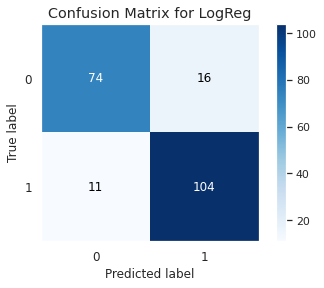

In [ ]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, logtahmin, normalize=False, title = 'Confusion Matrix for LogReg')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,logtahmin))

              precision    recall  f1-score   support

           0       0.87      0.82      0.85        90
           1       0.87      0.90      0.89       115

    accuracy                           0.87       205
   macro avg       0.87      0.86      0.87       205
weighted avg       0.87      0.87      0.87       205



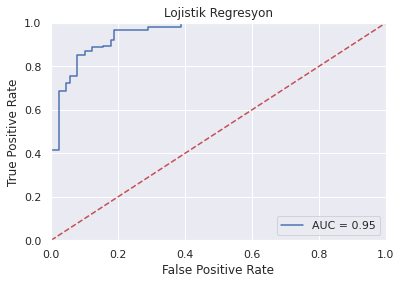

In [ ]:
# ROC EĞRİSİ - LOGISTIC REGRESYON
logtahmin = lr.predict_proba(X_test)
logtahmin= logtahmin[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, logtahmin)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Lojistik Regresyon')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Normalizasyon

Bir de değişkenlerimi normalleştirerek sonuçları görelim.

Normalleştirme her bir değişkenin maksimum ve minimum değerlerini 0-1 arasında gösterir.

In [ ]:
X = df.drop('target',axis=1) # X
y = df.target # y

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X_normalized = pd.DataFrame(np_scaled)
X_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.479167,1.0,0.292453,0.196347,0.0,0.740458,0.0,0.161290,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.500000,1.0,0.433962,0.175799,1.0,0.641221,1.0,0.500000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.854167,1.0,0.481132,0.109589,0.0,0.412214,1.0,0.419355,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.666667,1.0,0.509434,0.175799,0.0,0.687023,0.0,0.000000,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.687500,0.0,0.415094,0.383562,1.0,0.267176,0.0,0.306452,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
                                   X_normalized, # target hariç veri setinin tamamı (X)
                                   y, # target (Y)
                                   test_size = .2, # %80 train %20 test olmak üzere ayırdık.
                                   random_state=1905)
lr = LogisticRegression()
lr.fit(X_train,y_train)

lr_score = lr.score(X_test,y_test)
print("Test Accuracy {:.2f}%".format(lr_score*100))

Test Accuracy 86.83%


## 2. Support Vector Machine (SVM) Algorithm

In [ ]:
svm = SVC(random_state = 1)
svm.fit(X_train, y_train)
svm_score = svm.score(X_test,y_test)
print("Test Accuracy of SVM Algorithm: {:.2f}%".format(svm_score*100))

Test Accuracy of SVM Algorithm: 94.63%


In [ ]:
svm_cv = cross_val_score (svm, X_test, y_test, cv = 10).mean()
svm_cv

0.6192857142857143

## 3.K-Nearest Neighbour (KNN) Classification

Tahminlerin gözlem benzerliğine göre yapılmasıdır.

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(
                                   X_normalized, # target hariç veri setinin tamamı (X)
                                   y, # target (Y)
                                   test_size = .2, # %80 train %20 test olmak üzere ayırdık.
                                   random_state=1905)
# KNN Model
knn = KNeighborsClassifier(n_neighbors = 2)  # n_neighbors means k
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)

knn_score = knn.score(X_test, y_test)
print("{} NN Score: {:.2f}%".format(knn.n_neighbors, knn_score*100))

2 NN Score: 96.10%


n_neighbors = 2 olduğunda skorum: 96.10

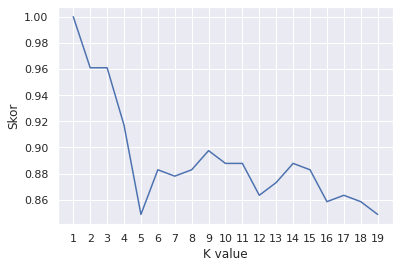

Maximum KNN Score is 100.00%


In [ ]:
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))

sns.set()
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Skor")
plt.savefig('kvalue.png',transparent=True)
plt.show()

knn_score = max(scoreList)
print("Maximum KNN Score is {:.2f}%".format((max(scoreList))*100))


Maksimum KNN skorum 100.00%

In [ ]:
knn_cv = cross_val_score (knn, X_test, y_test, cv = 10).mean()
knn_cv

0.7176190476190476

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn0=time()
knn.fit(X_train, y_train)
knn_time=time()-knn0
print("knn time:", knn_time)


knn time: 0.010719537734985352


In [ ]:
tahminknn = knn.predict(X_test)

In [ ]:
accuracy_knn = accuracy_score(y_test, tahminknn)
accuracy_knn

0.9609756097560975

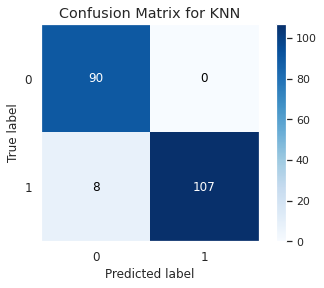

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, tahminknn, normalize=False, title = 'Confusion Matrix for KNN')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,tahminknn))

              precision    recall  f1-score   support

           0       0.92      1.00      0.96        90
           1       1.00      0.93      0.96       115

    accuracy                           0.96       205
   macro avg       0.96      0.97      0.96       205
weighted avg       0.96      0.96      0.96       205



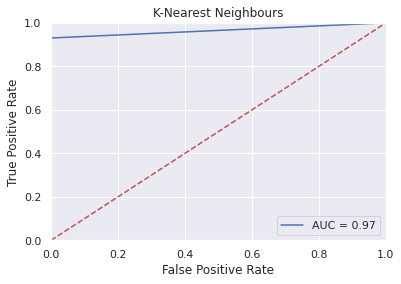

In [ ]:
### ROC EĞRİSİ KNN
knntahmin = knn.predict_proba(X_test)
knntahmin= knntahmin[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, tahminknn)
roc_auc = metrics.auc(fpr, tpr)


plt.title('K-Nearest Neighbours')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 4. Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
gaussianNaiveBayes = GaussianNB()
gaussianNaiveBayes0=time()

In [ ]:
 gaussianNaiveBayes.fit(X_train, y_train.ravel())

GaussianNB()

In [ ]:
gaussianNaiveBayes_time=time()-gaussianNaiveBayes0
print("gaussian naive bayes time:", gaussianNaiveBayes_time)


gaussian naive bayes time: 117.9769082069397


In [ ]:
prediction1 = gaussianNaiveBayes.predict(X_test)

In [ ]:
tahmingaussianNaiveBayes = gaussianNaiveBayes.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning:

X has feature names, but GaussianNB was fitted without feature names



In [ ]:
from sklearn.metrics import accuracy_score,precision_score
accuracy_gaussianNaiveBayes = accuracy_score(y_test, prediction1)
accuracy_gaussianNaiveBayes

0.8682926829268293

In [ ]:
accuracy_gaussianNaiveBayes_cv = cross_val_score (gaussianNaiveBayes, X_test, y_test, cv = 10).mean()
accuracy_gaussianNaiveBayes_cv

0.7854761904761904

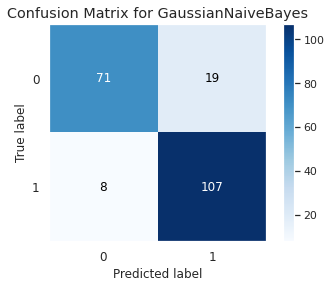

In [ ]:
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test, prediction1, normalize=False, title = 'Confusion Matrix for GaussianNaiveBayes')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,prediction1))

              precision    recall  f1-score   support

           0       0.90      0.79      0.84        90
           1       0.85      0.93      0.89       115

    accuracy                           0.87       205
   macro avg       0.87      0.86      0.86       205
weighted avg       0.87      0.87      0.87       205



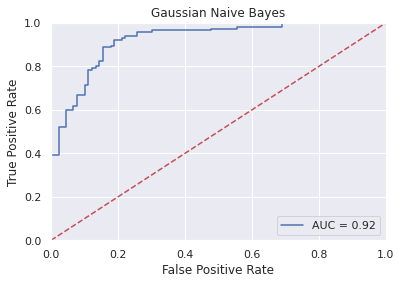

In [ ]:
#ROC EĞRİSİ - Gaussian Naive Bayes
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
prediction1 = gaussianNaiveBayes.predict_proba(X_test)
prediction1= prediction1[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, prediction1)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Gaussian Naive Bayes')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 5.Bernoulli Naive Bayes


In [ ]:
from sklearn.naive_bayes import BernoulliNB
bernoulliNaiveBayes = BernoulliNB(binarize= 0.0)
bernoulliNaiveBayes0=time()

In [ ]:
bernoulliNaiveBayes.fit(X_train, y_train.ravel())
bernoulliNaiveBayes_time=time()-bernoulliNaiveBayes0
print("bernoulli naive bayes time:", bernoulliNaiveBayes_time)


bernoulli naive bayes time: 9.946449995040894


In [ ]:
bernollitahmin = bernoulliNaiveBayes.predict(X_test)

In [ ]:
Accuracy_bnb = accuracy_score(y_test, bernollitahmin)
Accuracy_bnb

0.848780487804878

In [ ]:
accuracy_BernoulliNaiveBayes_cv = cross_val_score (bernoulliNaiveBayes, X_test, y_test, cv = 10).mean()
accuracy_BernoulliNaiveBayes_cv

0.8497619047619048

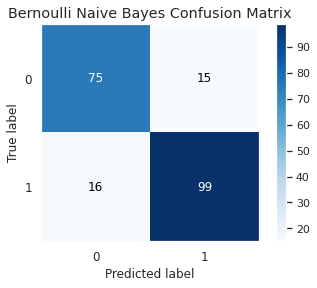

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, bernollitahmin, normalize=False, title = 'Bernoulli Naive Bayes Confusion Matrix')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,bernollitahmin))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83        90
           1       0.87      0.86      0.86       115

    accuracy                           0.85       205
   macro avg       0.85      0.85      0.85       205
weighted avg       0.85      0.85      0.85       205



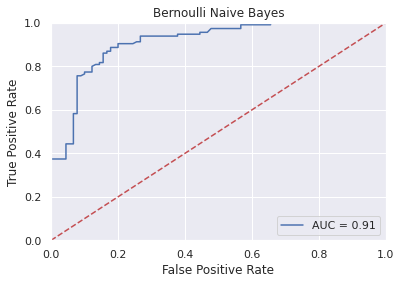

In [ ]:
#Bernolli Naive Bayes ROC eğrisi
bernollitahmin = bernoulliNaiveBayes.predict_proba(X_test)
bernollitahmin= bernollitahmin[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, bernollitahmin)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Bernoulli Naive Bayes')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 6.Decision Tree Algorithm(Karar Ağaçları)

Normalleştirilmemiş veri setiyle daha yüksek skor yakalandı.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), # target hariç veri setinin tamamı (X)
                                   y, # target (Y)
                                   test_size = .2, # %80 train %20 test olmak üzere ayırdık.
                                   random_state=1905)
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

dtc_score = dtc.score(X_test, y_test)
print("Decision Tree Test Accuracy {:.2f}%".format(dtc_score*100))

Decision Tree Test Accuracy 100.00%


In [ ]:
accuracy_dt_cv = cross_val_score (gaussianNaiveBayes, X_test, y_test, cv = 10).mean()
accuracy_dt_cvaccuracy_dt_cv = cross_val_score (gaussianNaiveBayes, X_test, y_test, cv = 10).mean()
accuracy_dt_cv

0.7854761904761904

In [ ]:
modeldecisiontree= (DecisionTreeClassifier(max_depth =3))
dt0=time()
modeldecisiontree.fit(X_train, y_train.ravel())
dt_time=time()-dt0
tahmindt = modeldecisiontree.predict(X_test) #prediction

accuracy_dt = accuracy_score(y_test, tahmindt)
accuracy_dt

0.824390243902439

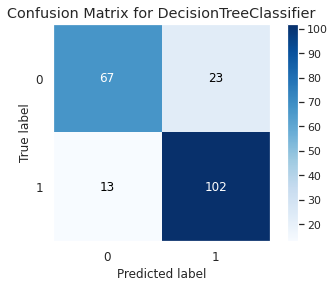

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, tahmindt, normalize=False, title = 'Confusion Matrix for DecisionTreeClassifier')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,tahmindt))

              precision    recall  f1-score   support

           0       0.84      0.74      0.79        90
           1       0.82      0.89      0.85       115

    accuracy                           0.82       205
   macro avg       0.83      0.82      0.82       205
weighted avg       0.83      0.82      0.82       205



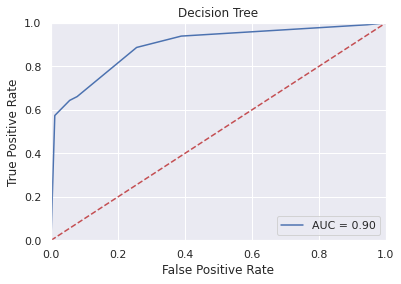

In [ ]:
#Roc Eğrisi
tahmindt = modeldecisiontree.predict_proba(X_test)
tahmindt= tahmindt[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, tahmindt)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Decision Tree')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

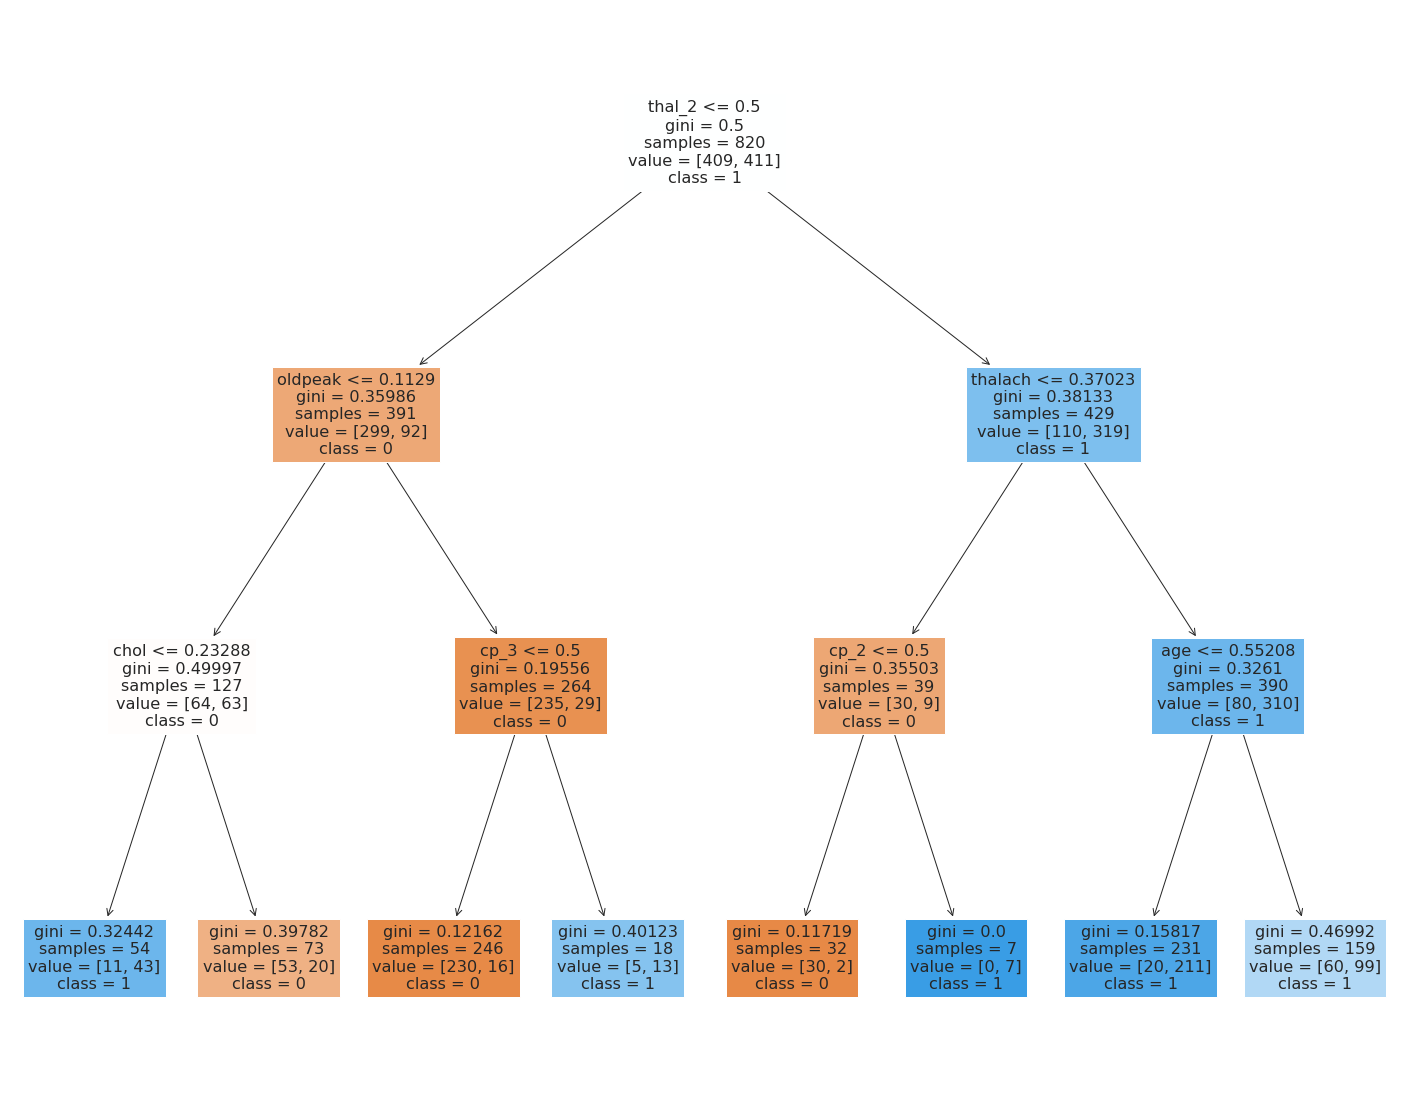

In [ ]:
from sklearn import tree

text_representation = tree.export_text(modeldecisiontree)
dt_clf = modeldecisiontree

plt.figure(figsize = (25,20))
tree.plot_tree(dt_clf,
              feature_names = df.columns.tolist()[:-1],
              class_names = ["0","1"],
              filled = True,
              precision = 5
              )
plt.show()

## 7.Random Forest Classification(Rastgele Orman Sınıflandırılması)


In [ ]:
# Random Forest Classification
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, y_train)

rf_score = rf.score(X_test, y_test)
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(rf_score*100))

Random Forest Algorithm Accuracy Score : 100.00%


In [ ]:
modelrf = RandomForestClassifier(n_estimators=3)
rf0=time()

In [ ]:
modelrf.fit(X_train, y_train.ravel())
rf_time=time()-rf0
print("random forest time:", rf_time)
tahminrf= modelrf.predict(X_test)
accuracy_rf = accuracy_score(y_test, tahminrf)
accuracy_rf

random forest time: 11214.730671405792


0.9804878048780488

In [ ]:
accuracy_rf_cv = cross_val_score (gaussianNaiveBayes, X_test, y_test, cv = 10).mean()
accuracy_rf_cv

0.7854761904761904

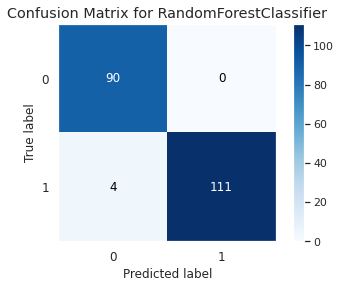

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, tahminrf, normalize=False, title = 'Confusion Matrix for RandomForestClassifier')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,tahminrf))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        90
           1       1.00      0.97      0.98       115

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



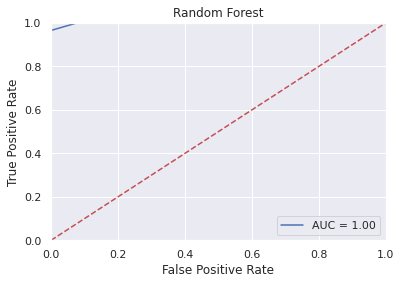

In [ ]:
#roc eğrisi
tahminrf = modelrf.predict_proba(X_test)
tahminrf= tahminrf[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, tahminrf)
roc_auc = metrics.auc(fpr, tpr)


plt.title('Random Forest')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## 8.Yapay Sinir Ağları(Artificial Neural Network)

In [ ]:
mlpc = MLPClassifier().fit(X_train, y_train)
y_pred_ysa = mlpc.predict(X_test)
ysa_acc=accuracy_score(y_test, y_pred_ysa)
ysa_acc

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



0.9414634146341463

In [ ]:
accuracy_ysa_cv = cross_val_score(mlpc, X_test, y_test, cv = 10).mean()
accuracy_ysa_cv

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iter

0.8502380952380953

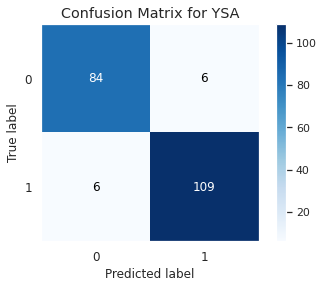

In [ ]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_ysa, normalize=False, title = 'Confusion Matrix for YSA')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_ysa))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        90
           1       0.95      0.95      0.95       115

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205



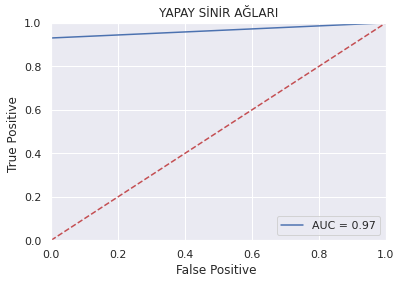

In [ ]:
#ysa False-Positive True-Positive Hesaplanması
y_pred_ysa = mlpc.predict_proba(X_test)
y_pred_ysa= y_pred_ysa[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, tahminknn)
roc_auc = metrics.auc(fpr, tpr)


plt.title('YAPAY SİNİR AĞLARI')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive ')
plt.xlabel('False Positive ')
plt.show()

### ALGORİTMALARIN ACCURACY DEĞERLERİNİN KARŞILAŞTIRMASI

###Algoritmaların Çalışma Zamanları

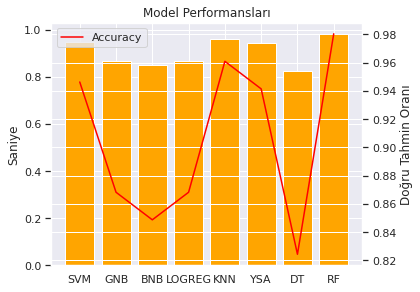

In [ ]:
fig, ax1 = plt.subplots()
objects = ['SVM','GNB', 'BNB','LOGREG','KNN','YSA','DT','RF']
y_pos = np.arange(len(objects))
performance_acc = [ svm_score, accuracy_gaussianNaiveBayes, Accuracy_bnb, Accuracy_lr,accuracy_knn,ysa_acc,accuracy_dt,accuracy_rf]
performance_time = [ svm_score, accuracy_gaussianNaiveBayes, Accuracy_bnb, Accuracy_lr,accuracy_knn,ysa_acc,accuracy_dt,accuracy_rf]
ax1.set_ylabel('Saniye')
ax1.bar(y_pos, performance_time, color='orange')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
ax2.set_ylabel('Doğru Tahmin Oranı')
ax2.plot(y_pos, performance_acc, color='red')
plt.xticks(y_pos, objects)
fig.tight_layout()
plt.title('Model Performansları')
plt.legend(['Accuracy'], loc='upper left')
plt.show()

###Algoritmaların Karşılaştırılması Başarı Oranları


In [ ]:
met_accuracy = {
    "Logistic Regression":lr_score,
    "Gaussian Naive Bayes" : nb_score,
    "Bernolli Naive Bayes" :  Accuracy_bnb,
    "KNN" : knn_score,
    "SVM" : svm_score,
    "Decision Tree" : dtc_score,
    "Random Forest" : rf_score


}

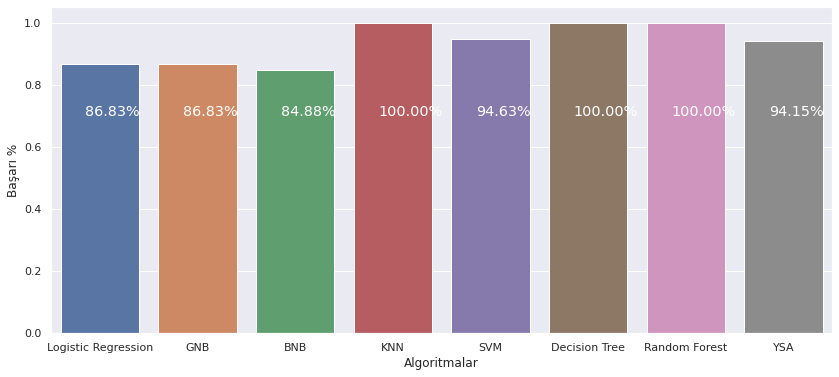

In [ ]:
methods = ["Logistic Regression","GNB","BNB", "KNN", "SVM", "Decision Tree", "Random Forest", "YSA"]
accuracy = [lr_score, nb_score, Accuracy_bnb, knn_score, svm_score, dtc_score, rf_score, ysa_acc]

sns.set()
plt.figure(figsize=(14,6))
plt.ylabel("Başarı %")
plt.xlabel("Algoritmalar")
sns.barplot(x=methods, y=accuracy, palette="deep")

# Kırılımlar Üzerine Değerlerini Yazmak
for line in range(len(methods)):
     plt.text(line-0.15, # x
              0.70, # y
             "{:.2f}%".format(accuracy[line]*100), # yazdırılacak değer
             horizontalalignment='left',
              size='large',
             color="white",
             )


plt.savefig('karşılaştır.png',transparent=True)


plt.show()